In [1]:
import json
import requests
import csv
import pandas as pd
import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import operator
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from pandas.tools.plotting import autocorrelation_plot

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
indicator_data = pd.read_csv('P:\\ADS\\Final\\Indicators_Cleaned.csv',header=0,parse_dates=True,index_col='Year',date_parser=dateparse, low_memory=False) 
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [3]:
indicator_data.reset_index()
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [5]:
brazil_df_ind9 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.TRD.GNFS.ZS'])) &\
                                (indicator_data['CountryCode'] == 'BR')]

In [6]:
brazil_df_ind9.index

DatetimeIndex(['2016-01-01', '2015-01-01', '2014-01-01', '2013-01-01',
               '2012-01-01', '2011-01-01', '2010-01-01', '2009-01-01',
               '2008-01-01', '2007-01-01', '2006-01-01', '2005-01-01',
               '2004-01-01', '2003-01-01', '2002-01-01', '2001-01-01',
               '2000-01-01', '1999-01-01', '1998-01-01', '1997-01-01',
               '1996-01-01', '1995-01-01', '1994-01-01', '1993-01-01',
               '1992-01-01', '1991-01-01', '1990-01-01', '1989-01-01',
               '1988-01-01', '1987-01-01', '1986-01-01', '1985-01-01',
               '1984-01-01', '1983-01-01', '1982-01-01', '1981-01-01',
               '1980-01-01', '1979-01-01', '1978-01-01', '1977-01-01',
               '1976-01-01', '1975-01-01', '1974-01-01', '1973-01-01',
               '1972-01-01', '1971-01-01', '1970-01-01', '1969-01-01',
               '1968-01-01', '1967-01-01', '1966-01-01', '1965-01-01',
               '1964-01-01', '1963-01-01', '1962-01-01', '1961-01-01',
      

In [7]:
ts = brazil_df_ind9['Value'] 
ts1 = brazil_df_ind9[['Value']].copy() 
ts1.head()

,Value
Year,
2016-01-01,24.613720
2015-01-01,26.955914
2014-01-01,24.685427
2013-01-01,25.561879
2012-01-01,24.765305


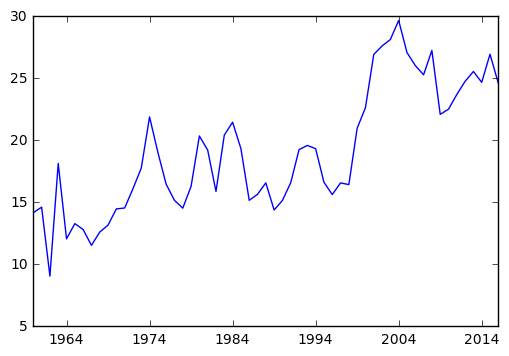

In [8]:
plt.plot(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


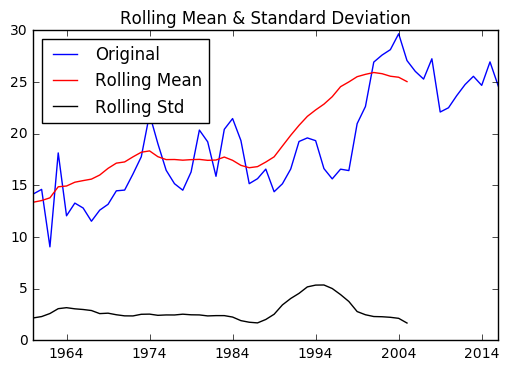

Results of Dickey-Fuller Test:
Test Statistic                 -2.041569
p-value                         0.268649
#Lags Used                      0.000000
Number of Observations Used    56.000000
Critical Value (10%)           -2.595137
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
dtype: float64


In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts1.Value)

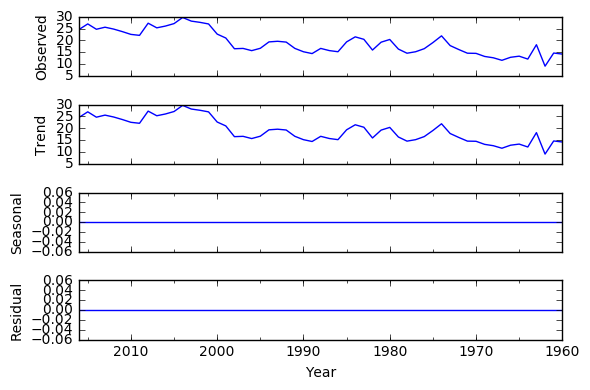

In [10]:
decomposition = sm.tsa.seasonal_decompose(ts1, model='additive')
fig = decomposition.plot()
plt.show()

## Taking Log

In [11]:
def logTransform(df):
    ts_log = np.log(df)
    plt.plot(ts_log)
    return ts_log

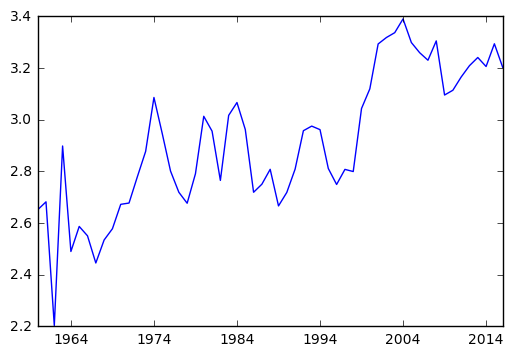

In [12]:
ts1_log = logTransform(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


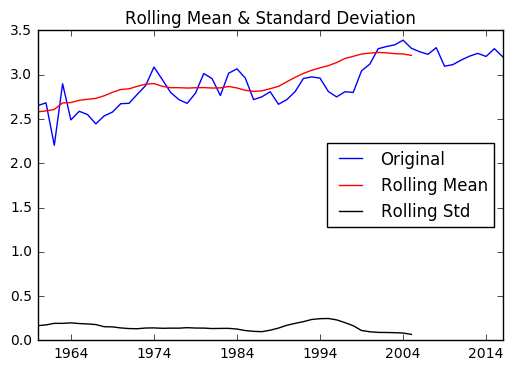

Results of Dickey-Fuller Test:
Test Statistic                 -1.738740
p-value                         0.411271
#Lags Used                      1.000000
Number of Observations Used    55.000000
Critical Value (10%)           -2.595670
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
dtype: float64


In [13]:
test_stationarity(ts1_log.Value)

## Log first difference 

In [14]:
def logFirstDifference(ts1_log):
    ts1_log_diff = ts1_log - ts1_log.shift()
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


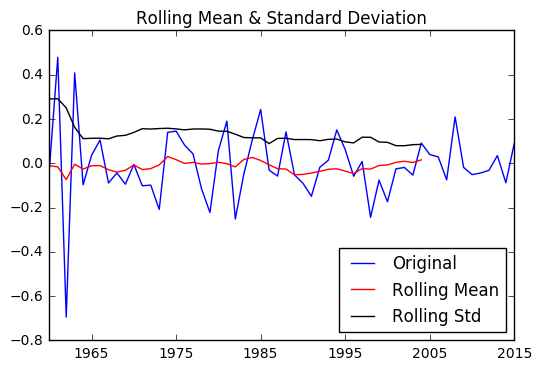

Results of Dickey-Fuller Test:
Test Statistic                -1.124709e+01
p-value                        1.748744e-20
#Lags Used                     0.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (10%)          -2.595670e+00
Critical Value (1%)           -3.555273e+00
Critical Value (5%)           -2.915731e+00
dtype: float64


In [15]:
ts1_log_diff = logFirstDifference(ts1_log)
test_stationarity(ts1_log_diff.Value)

## First difference 

In [16]:
def firstDifference(df):
    #ts_first_diff = df - df.shift()
    #ts_first_diff.dropna(inplace=True)
    ts_first_diff = df.diff()
    ts_first_diff.dropna(inplace=True)
    return ts_first_diff



C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


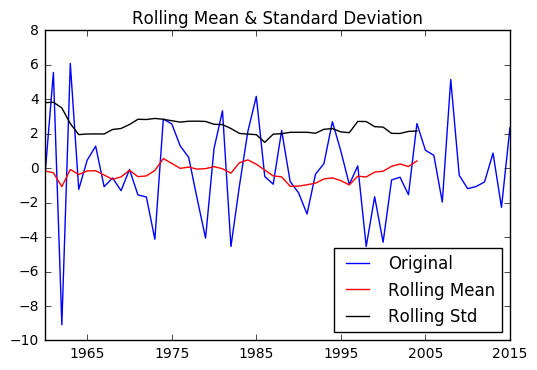

Results of Dickey-Fuller Test:
Test Statistic                -9.680436e+00
p-value                        1.208711e-16
#Lags Used                     0.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (10%)          -2.595670e+00
Critical Value (1%)           -3.555273e+00
Critical Value (5%)           -2.915731e+00
dtype: float64


In [17]:
ts1_first_diff = firstDifference(ts1)
test_stationarity(ts1_first_diff.Value)

In [18]:
def expWeightedavg(ts1_log):
    expwighted_avg = pd.ewma(ts1_log, halflife=57)
    ts_log_ewma_diff = ts1_log - expwighted_avg
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(min_periods=0,adjust=True,halflife=57,ignore_na=False).mean()
  from ipykernel import kernelapp as app
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


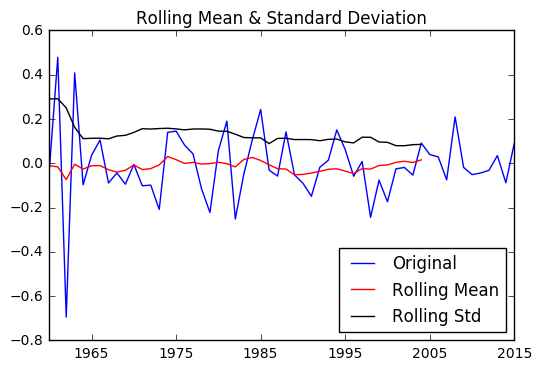

Results of Dickey-Fuller Test:
Test Statistic                -1.124709e+01
p-value                        1.748744e-20
#Lags Used                     0.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (10%)          -2.595670e+00
Critical Value (1%)           -3.555273e+00
Critical Value (5%)           -2.915731e+00
dtype: float64


In [19]:
ts_log_ewma_diff = expWeightedavg(ts1_log)
test_stationarity(ts_log_ewma_diff.Value)

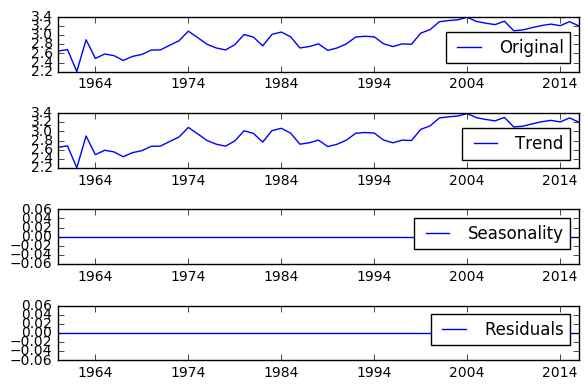

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts1_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [21]:
lag_acf = acf(ts1_log, nlags=10)
lag_pacf = pacf(ts1_log, nlags=10, method='ols')

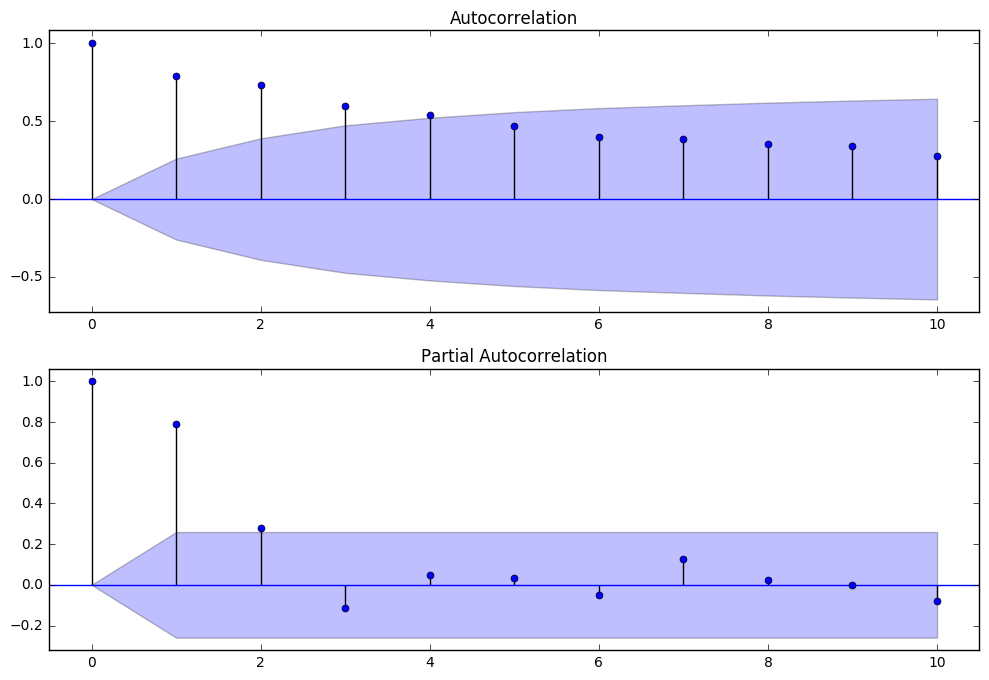

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1_log, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1_log, lags=10, ax=ax2)

- As seen from the graph above both ACF and PACF are geometric hence this is an ARMA model

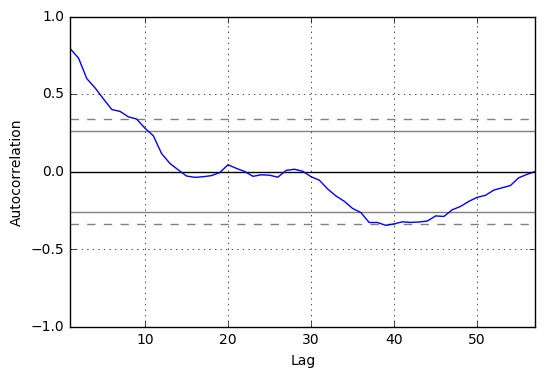

In [23]:
autocorrelation_plot(ts1_log)
plt.show()

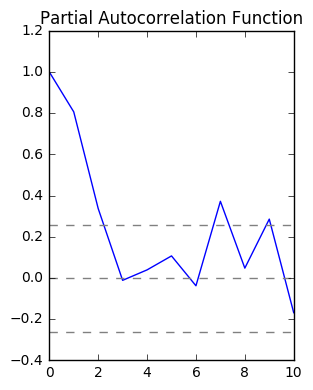

In [24]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [62]:
aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}

In [63]:
def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

In [64]:
def AR_Model(ts):
    model = ARIMA(ts, order=(3, 0, 0))
    results_AR = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(3, 0, 0))',results_AR)
    print('Lag: %s' % results_AR.k_ar)
    print('Coefficients: %s' % results_AR.params)
    #print(results_AR.summary())
    predict_MA_HPI = np.exp(results_AR.predict(10, 10, dynamic=True))
    print(predict_MA_HPI)
    plt.plot(ts1_log)
    plt.plot(results_AR.fittedvalues, color='red')
    #print(np.exp(results_AR.fittedvalues))
    print(results_AR.aic)
    return results_AR

Lag: 3
Coefficients: const          2.922478
ar.L1.Value    0.552444
ar.L2.Value    0.346210
ar.L3.Value   -0.027498
dtype: float64
2006-01-01    25.038872
Freq: -1AS-JAN, dtype: float64
-44.264126150701884


C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


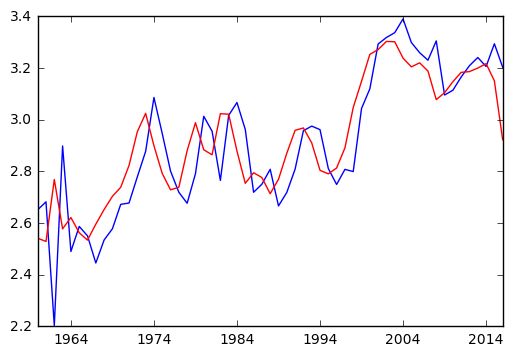

In [65]:
model_AR = AR_Model(ts1_log)

In [66]:
def MA_Model(ts):
    model = ARIMA(ts, order=(0,0, 4))
    results_MA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(0, 0, 4))',results_MA)
    print('Lag: %s' % results_MA.k_ar)
    print('Coefficients: %s' % results_MA.params)
    print(results_MA.summary())
    plt.plot(ts)
    plt.plot(results_MA.fittedvalues, color='red')
    return results_MA

Lag: 0
Coefficients: const          2.921212
ma.L1.Value    0.622025
ma.L2.Value    0.674546
ma.L3.Value    0.342184
ma.L4.Value    0.326365
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(0, 4)   Log Likelihood                  23.041
Method:                       css-mle   S.D. of innovations              0.160
Date:                Wed, 16 Aug 2017   AIC                            -34.082
Time:                        22:04:54   BIC                            -21.824
Sample:                    01-01-2016   HQIC                           -29.318
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           2.9212      0.061     47.525      0.

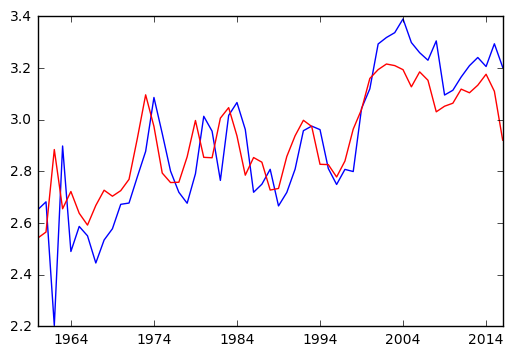

In [67]:
model_MA = MA_Model(ts1_log)

In [68]:
def Combined_Model(ts):
    model = ARIMA(ts, order=(2, 0, 1))  
    results_ARIMA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2,0, 1))',results_ARIMA)
    print('Lag: %s' % results_ARIMA.k_ar)
    print('Coefficients: %s' % results_ARIMA.params)
    print(results_ARIMA.summary())
    plt.plot(ts)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    return results_ARIMA

Lag: 2
Coefficients: const          2.922599
ar.L1.Value    0.463079
ar.L2.Value    0.396410
ma.L1.Value    0.090153
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(2, 1)   Log Likelihood                  27.134
Method:                       css-mle   S.D. of innovations              0.149
Date:                Wed, 16 Aug 2017   AIC                            -44.267
Time:                        22:04:57   BIC                            -34.052
Sample:                    01-01-2016   HQIC                           -40.297
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           2.9226      0.133     21.930      0.000         2.661     3.

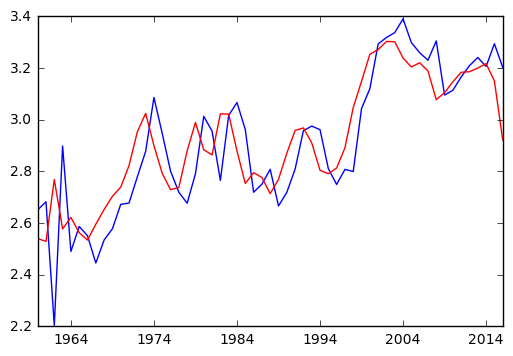

In [69]:
model_Combined = Combined_Model(ts1_log)

In [70]:
best_model =  min(aic_dict.items(),key=operator.itemgetter(1))[0]
print('Best Model is ', best_model)

Best Model is  ARIMA(ts, order=(2,0, 1))


In [169]:
aic_metric

,AIC,Modelname
0,-408.680867,"ARIMA(ts, order=(2, 0, 0))"
0,-259.219135,"ARIMA(ts, order=(0, 0, 5))"
0,-451.881888,"ARIMA(ts, order=(4,0, 0))"


In [71]:
#Forecast using Best Model
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    #output.tolist()
    output = np.exp(output)
    #out=normal(output)
    return output

In [72]:
forecast(model_Combined,15)

array([ 15.05768506,  15.14372453,  15.55114162,  15.77910254,
        16.05385762,  16.27632983,  16.49287128,  16.68490038,
        16.86269509,  17.02360772,  17.17063863,  17.30417969,
        17.42567491,  17.53599707,  17.63616795])

In [73]:
def FittedValues(model):
    fittedVal=model.fittedvalues
    #PredictedVal=normal(fittedVal)
    #PredictedVal= fittedVal.tolist()
    fittedVal = np.exp(fittedVal)
    print('Predicted existing values are:')
    return fittedVal
FittedValues(model_Combined)

Predicted existing values are:


Year
2016-01-01    18.589533
2015-01-01    23.350977
2014-01-01    24.964812
2013-01-01    24.538135
2012-01-01    24.196391
2011-01-01    24.137913
2010-01-01    23.270010
2009-01-01    22.302698
2008-01-01    21.715252
2007-01-01    24.264291
2006-01-01    25.044329
2005-01-01    24.637804
2004-01-01    25.510650
2003-01-01    27.169733
2002-01-01    27.199733
2001-01-01    26.354942
2000-01-01    25.874102
1999-01-01    23.309396
1998-01-01    21.058797
1997-01-01    18.017110
1996-01-01    16.664096
1995-01-01    16.301835
1994-01-01    16.515551
1993-01-01    18.372646
1992-01-01    19.461997
1991-01-01    19.275658
1990-01-01    17.642540
1989-01-01    15.950053
1988-01-01    15.089171
1987-01-01    16.065250
1986-01-01    16.367362
1985-01-01    15.697334
1984-01-01    17.801485
1983-01-01    20.532479
1982-01-01    20.553099
1981-01-01    17.530851
1980-01-01    17.885410
1979-01-01    19.877482
1978-01-01    17.811831
1977-01-01    15.462371
1976-01-01    15.322938
1975-01-01 

In [71]:
def normal(predictions_ARIMA_diff):
    #predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    predictions_ARIMA_diff_cumsum = np.cumsum(np.concatenate((ts1.values[0], predictions_ARIMA_diff)))
    print('normalized')
    #predictions_ARIMA_diff_cumsum=np.absolute(predictions_ARIMA_diff_cumsum)
    return predictions_ARIMA_diff_cumsum